<h1>Проект: Принятие решений в бизнесе</h1>

<p><span style="color:#37474f;">В этом проекте будет проведен анализ крупного интернет-магазина. В наличии есть список гипотез, которые потенциально могут привести к увеличению выручки.</span><br><span style="color:#37474f;">Приоритизируем гипотезы и проанализируем предоставленные результаты A/B-теста.</span></p>

<p><span style="color:#37474f;">План проекта:</span></p>
<ol>
    <li><span style="color:#37474f;">Предобработка данных</span>
        <ol>
            <li><span style="color:#37474f;">Загрузка и просмотр данных</span></li>
            <li><span style="color:#37474f;">Обработка данных</span></li>
            <li><span style="color:#37474f;">Проверка проведенной обработки</span></li>
            <li><span style="color:#37474f;">Итог по данным</span></li>
        </ol>
    </li>
    <li><span style="color:#37474f;">Приоритизация гипотез</span>
        <ol>
            <li><span style="color:#37474f;">Приоритизация гипотез по ICE</span></li>
            <li><span style="color:#37474f;">Приоритизация гипотез по RICE</span></li>
            <li><span style="color:#37474f;">Анализ результата</span></li>
        </ol>
    </li>
    <li><span style="color:#37474f;">Анализ A/B-теста</span>
        <ol>
            <li><span style="color:#37474f;">Кумулятивная выручка по группам. График. Выводы</span></li>
            <li><span style="color:#37474f;">Кумулятивный средний чек по группам. График. Выводы</span></li>
            <li><span style="color:#37474f;">Относительное изменение кумулятивного среднего чека группы B к группе A. График. Выводы</span></li>
            <li><span style="color:#37474f;">Кумулятивное среднее количества заказов на посетителя по группам. График. Выводы</span></li>
            <li><span style="color:#37474f;">Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A. График. Выводы</span></li>
            <li><span style="color:#37474f;">Точечный график количества заказов по пользователям. График. Выводы</span></li>
            <li><span style="color:#37474f;">95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей</span></li>
            <li><span style="color:#37474f;">Точечный график стоимостей заказов. График. Выводы</span></li>
            <li><span style="color:#37474f;">95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.</span></li>
            <li><span style="color:#37474f;">Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы</span></li>
            <li><span style="color:#37474f;">Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы</span></li>
            <li><span style="color:#37474f;">Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы</span></li>
            <li><span style="color:#37474f;">Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы</span></li>
            <li><span style="color:#37474f;">Решение по результатам теста</span></li>
        </ol>
    </li>
</ol>

<h2><span style="color:#37474f;">Предобработка данных</span></h2>

<h3><span style="color:#37474f;">Загрузка и просмотр данных</span></h3>

In [1]:
# импорт библиотек, используемых в проекте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# отключения обрезки длинных значений в записях
pd.set_option('display.max_colwidth', None)

In [3]:
# загрузка данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv') 
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
# просмотр содержимого
display(hypothesis)
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
# информация о данных
print(hypothesis.info())
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 colum

In [6]:
print(f'В файле предоставлены данные с {orders["date"].min()} по {orders["date"].max()}')

В файле предоставлены данные с 2019-08-01 по 2019-08-31


<h3><span style="color:#37474f;">Обработка данных</span></h3>

In [7]:
# корректировка типа данных для даты
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
# не обязательное, но для соблюдения правил хорошего тона, действие
hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [9]:
# проверка на дубликаты
print(f'Количество явных дубликатов в данных: {orders.duplicated().sum()}')
print(f'Количество явных дубликатов в данных: {visitors.duplicated().sum()}')

Количество явных дубликатов в данных: 0
Количество явных дубликатов в данных: 0


<h3><span style="color:#37474f;">Проверка проведенной обработки</span></h3>

In [10]:
orders.info()
visitors.info()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 

<h3><span style="color:#37474f;">Итог по данным</span></h3>

<span style="color:#37474f;">Были загружены предоставленные файлы данных. Просмотрено содержимое и качество информации.<br>Охватываемый период: 01 августа 2019 - 31 августа 2019 года.<br>Количество записей по заказам: 1197<br>Количество записей о посещениях: 62, что соответствует наблюдениям за двумя группами в течение 31ого дня<br>Была проведена проверка на наличие явных дубликатов(не выявлено)<br>Колонки с датами были приведены к типу данных datetime<br>Имена колонок таблицы hypothesis были приведены к нижнему регистру.</span>

<h2><span style="color:#37474f;">Приоритизация гипотез</span></h2>

<h3><span style="color:#37474f;">Приоритизация гипотез по ICE</span></h3>

In [11]:
# подсчет веса ICE приоритизации
hypothesis['ice'] = round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)

# ICE приоритизация
print(f'ICE приоритизация: (Влияние * Уверенность в успехе)/Объём затраченных на реализацию усилий.')
display(hypothesis.loc[:,hypothesis.columns!='rice'].sort_values(by='ice',ascending=False))

ICE приоритизация: (Влияние * Уверенность в успехе)/Объём затраченных на реализацию усилий.


,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<h3><span style="color:#37474f;">Приоритизация гипотез по RICE</span></h3>

In [12]:
# подсчет веса RICE приоритизации
hypothesis['rice'] = round((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)

# RICE приоритизация
print(f'\nRICE приоритизация: (Охват аудитории * Влияние * Уверенность в успехе)/Объём затраченных на реализацию усилий.')
display(hypothesis.loc[:,hypothesis.columns!='ice'].sort_values(by='rice',ascending=False))


RICE приоритизация: (Охват аудитории * Влияние * Уверенность в успехе)/Объём затраченных на реализацию усилий.


,hypothesis,reach,impact,confidence,efforts,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


<h3><span style="color:#37474f;">Анализ результата</span></h3>

<span style="color:#37474f;">Т.к. приоритизация RICE учитывает дополнительно к ICE охват аудитории, то любая гипотеза, влияющая на всех пользователей/клиентов/посетителей, получит более высокий балл.<br>Так и произошло в данном примере: форма подписки, помещенная на все основные страницы, затронет всех посетителей сайта и, следовательно, её приоритет по RICE станет максимальным</span>

In [13]:
hypothesis['ice'] = hypothesis['ice'].apply(lambda x: int(100*x/hypothesis['ice'].max()))
hypothesis['rice'] = hypothesis['rice'].apply(lambda x: int(100*x/hypothesis['rice'].max()))#hypothesis_style.sort_values(by=['ice','rice'])
hypothesis.sort_values(by=['ice','rice'],ascending=False,inplace=True)
(hypothesis[['hypothesis','ice','rice']].style
    .set_caption('ICE/RICE приоритизация гипотез, %от максимального балла')
    .background_gradient(axis=None,
                         vmin=0,
                         vmax=100,
                         cmap='YlGnBu')
)

,hypothesis,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",100,14
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",82,35
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",69,100
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",49,35
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",43,50
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",12,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",8,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",6,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",6,2


<h2><span style="color:#37474f;">Анализ A/B-теста</span></h2>

<p><span style="color:#37474f;">Перед тем, как приступить непосредственно к анализу, проведем проверку данных на предмет соответствия параметрам A/B тестирования</span>

In [14]:
# проверка посетителей, попавших в обе группы тестирования
duplicate_visId = (orders
                   .groupby('visitorId')
                   .agg({'group':'nunique'})
                   .query('group>1')
                   .reset_index()
                   
                  )
print(f'Количество пользователей, попавших одновременно в 2 группы: {len(duplicate_visId)}')

Количество пользователей, попавших одновременно в 2 группы: 58


In [15]:
# уберем этих пользователей из результатов
orders = orders.query('~visitorId.isin(@duplicate_visId["visitorId"])')

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date','group'])
datesGroups.head(6)

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A
383,2019-08-03,B


<h3><span style="color:#37474f;">Кумулятивная выручка по группам. График. Выводы</span></h3>

In [17]:
# определим функцию для агрегирования данных и построения графиков

def rev_review(agg_func,no_graph=False): # передаем функцию агргирования и отключение построения графика
    ordersAggregated = (datesGroups
                        .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                               .agg({'date' : 'max', 
                                     'group' : 'max', 
                                     'transactionId' : 'nunique', 
                                     'visitorId' : 'nunique',
                                     'revenue':agg_func}),
                                 axis=1)
                        .sort_values(by=['date','group']))
    visitorsAggregated = (datesGroups
                          .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                 .agg({'date' : 'max',
                                       'group' : 'max',
                                       'visitors' : 'sum'}),
                                 axis=1)
                          .sort_values(by=['date','group']))
    
    cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                            left_on=['date', 'group'], 
                                            right_on=['date', 'group'])
    
    cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

    # датафрейм с кумулятивной выручкой по дням в группе А
    cumulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue']]
    # датафрейм с кумулятивной выручкой по дням в группе B
    cumulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue']]

    if(no_graph==False):
        display(ordersAggregated[['date','group','revenue']].head(6))
        plt.figure(figsize=(15,7))
        title='График кумулятивной выручки по группам'
        if (agg_func=='mean'):
            title='График кумулятивного среднего чека по группам'
        plt.title(title)
        # Строим график выручки группы А
        plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
        # Строим график выручки группы B
        plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
        plt.grid(True)
        plt.xlabel('Дата')
        plt.ylabel('Выручка')
        plt.legend() 
        plt.show()
    else:    
        return cumulativeData # возвращаем кумулятивную таблицу с заданной агрегацией

,date,group,revenue
55,2019-08-01,A,142779
66,2019-08-01,B,59758
175,2019-08-02,A,234381
173,2019-08-02,B,221801
291,2019-08-03,A,346854
383,2019-08-03,B,288850


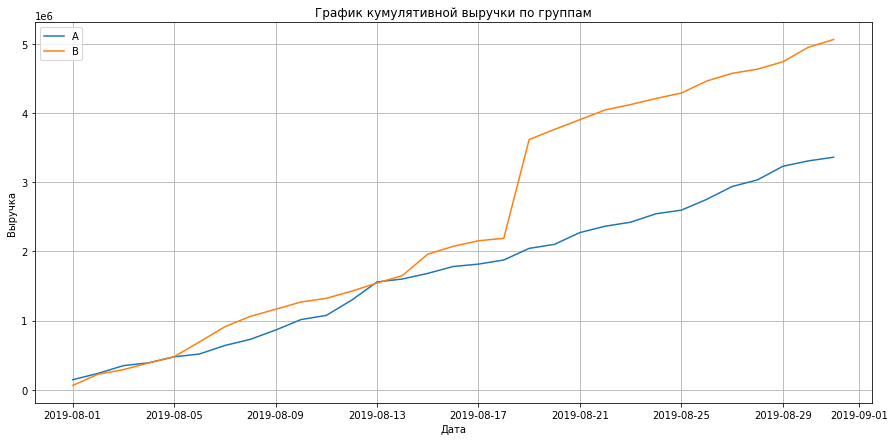

In [18]:
rev_review('sum') # кумулятивная выручка (функция sum) + график

<span style="color:#37474f;">В начале тестирования выручка у обоих групп растет равномерно и без сильных различий, но 18-19 августе в группе B был зафиксирован резкий скачок. После него плавный рост обоих групп продолжился. Что это был за скачок: аномальный случайный заказ или результат доработок - возможно, следует рассмотреть более внимательно</span>

<h3><span style="color:#37474f;">Кумулятивный средний чек по группам. График. Выводы</span></h3>

,date,group,revenue
55,2019-08-01,A,6207.782609
66,2019-08-01,B,3515.176471
175,2019-08-02,A,5580.500000
173,2019-08-02,B,5545.025000
291,2019-08-03,A,5255.363636
383,2019-08-03,B,5349.074074


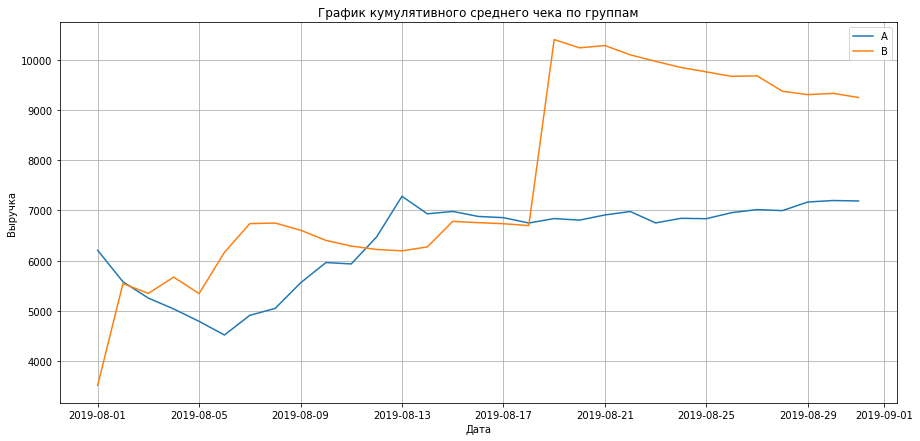

In [19]:
rev_review('mean') # кумулятивная средний чек (функция mean) + график

<span style="color:#37474f;">Картина по среднему чеку более говорящая: практически с самого начала средний кумулятивный чек в группе B был значительно выше, чем в группе A. В периоде с 12-08 по 18-08 средний чек группы A был несколько выше, но как в в случае с выручкой, 18-19 августа средний чек группы B резко ушел вверх. Этот скачок поднял график группы B выше, но в дальнейшем можно наблюдать его снижение. Для ясности и понимания требуется разбор скачка и больше данных для анализа.</span>

<h3><span style="color:#37474f;">Относительное изменение кумулятивного среднего чека группы B к группе A. График. Выводы</span></h3>

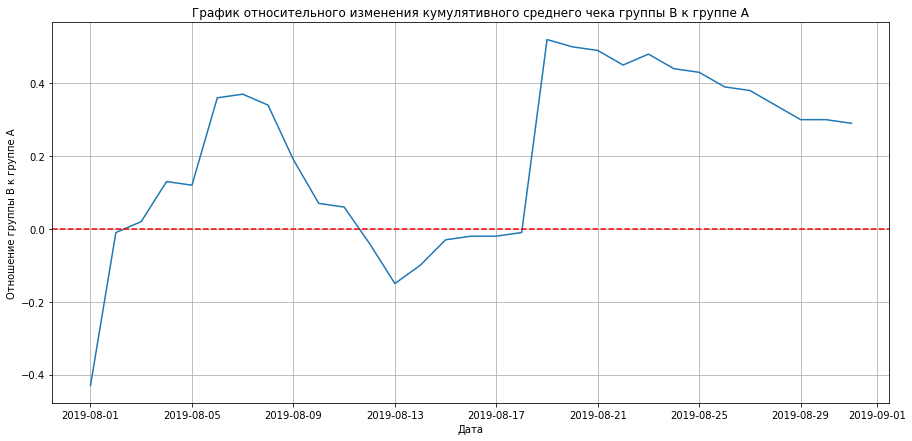

In [20]:
cd = rev_review('mean',no_graph=True) # нам нужны только кумулятивные данные среднего, без построения графика 

# собираем сводную таблицу для объединения 2 строк для групп A/B в одну строчку 
rev_rel = cd.pivot_table(index='date',columns='group',values='revenue').reset_index()

# добавляем столбец с отношением B к A
rev_rel['relation'] = round(rev_rel['B']/rev_rel['A']-1,2)

# строим график по этому столбцу
plt.figure(figsize=(15,7))
plt.title(f'График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(rev_rel['date'],rev_rel['relation'])
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel('Дата')
plt.ylabel('Отношение группы B к группе A')
plt.show()
del rev_rel # освобождаем память от ненужных в дальнейшем данных

<span style="color:#37474f;">Сделать определенные выводы по этому графику нельзя. Никакой стабильности нет.</span>

<h3><span style="color:#37474f;">Кумулятивное среднее количества заказов на посетителя по группам. График. Выводы</span></h3>

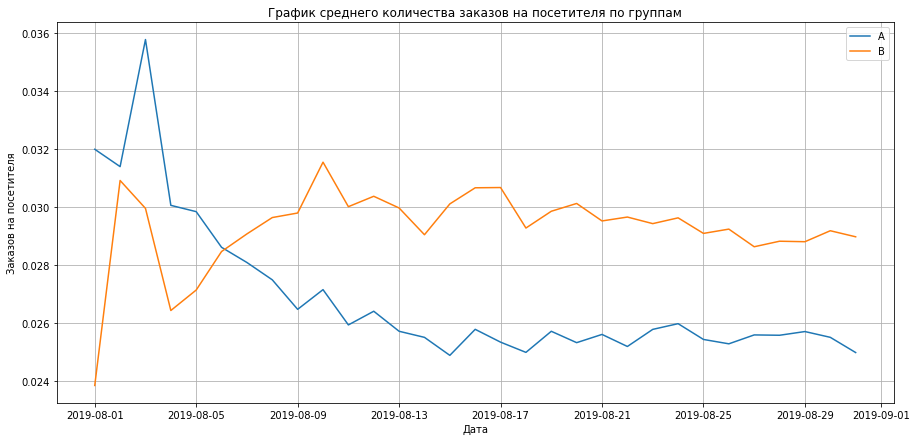

In [21]:
cd['order_per_visitor']=cd['orders']/cd['visitors'] # используя ранее сделанную кумулятивную таблицу,
# добавляем в нее новый столбец со средним количеством заказов

# строим графики по этому столбцу с раделением по группам
plt.figure(figsize=(15,7))
plt.title(f'График среднего количества заказов на посетителя по группам')

# Строим график выручки группы A
plt.plot(cd.query('group=="A"')['date'], cd.query('group=="A"')['order_per_visitor'], label='A')
# Строим график выручки группы B
plt.plot(cd.query('group=="B"')['date'], cd.query('group=="B"')['order_per_visitor'], label='B')

plt.grid(True)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Заказов на посетителя')
plt.show()

<span style="color:#37474f;">Хороший график для того, чтобы сделать вывод о том, что среднее количество заказов в группе B лучше, чем в группе A. Стабильно. Снижение обоих кривых свзяно с накоплением данных и приближением к реальным показателям.</span>

<h3><span style="color:#37474f;">Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A. График. Выводы</span></h3>

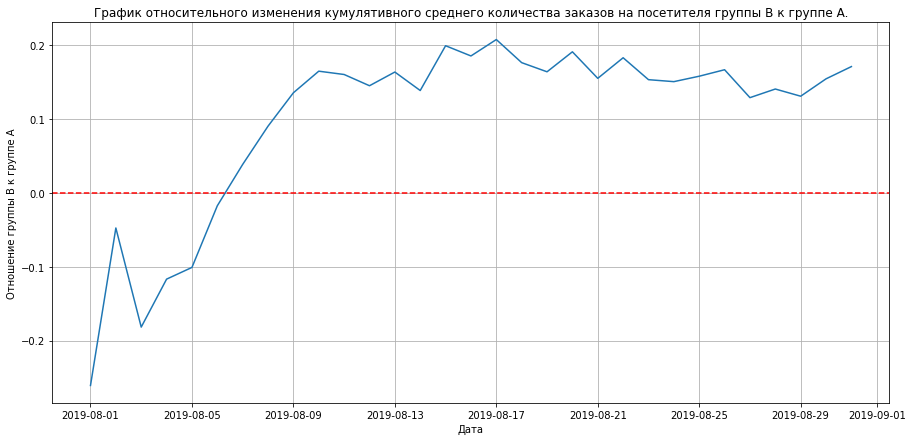

In [22]:
# используя ранее сделанную кумулятивную таблицу, создаем на ее основе сводную
# чтобы строки групп стали столбцами
orders_rel = cd.pivot_table(index='date',columns='group',values='orders').reset_index()

orders_rel['change'] = orders_rel['B']/orders_rel['A']-1 # считаем отношение заказов группы В к группе A

# строим график по этому столбцу
plt.figure(figsize=(15,7))
plt.title(f'График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.plot(orders_rel['date'],orders_rel['change'])
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel('Дата')
plt.ylabel('Отношение группы B к группе A')
plt.show()
del orders_rel # освобождаем память от ненужных в дальнейшем данных

<span style="color:#37474f;">Этот график так же показывает, что среднее количество заказов в группе B стабильно выше, чем в группе A. Отрицательные значения в левой части графика - недостаточное количество накопленных данных в начале тестирования. Я бы посоветовал не обращать на них внимания из-за выстокой вероятности влияния выбросов в этот момент</span>

<h3><span style="color:#37474f;">Точечный график количества заказов по пользователям. График. Выводы</span></h3>

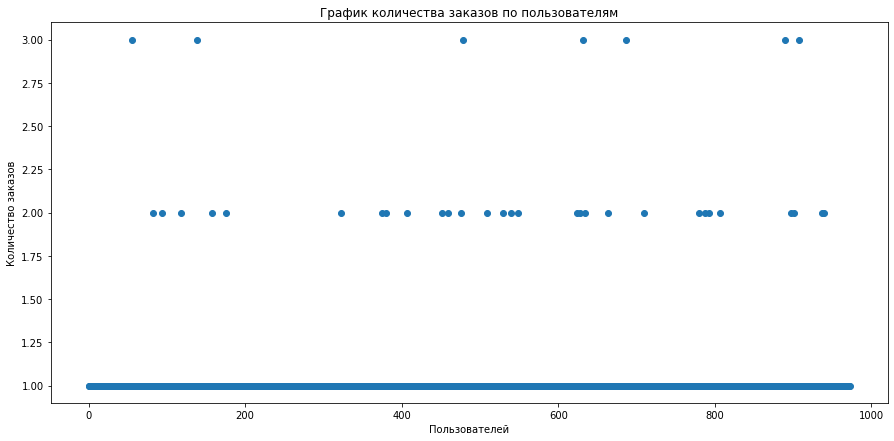

In [23]:
# используя ранее сделанную кумулятивную таблицу, создаем на ее основе группировку
# по посетителям и количеству их заказов
orders_per_user = orders.groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})

# строим точечный график
x_value = pd.Series(range(0,len(orders_per_user)))
plt.figure(figsize=(15,7))
plt.title(f'График количества заказов по пользователям')
plt.xlabel('Пользователей')
plt.ylabel(f'Количество заказов')
plt.scatter(x_value,orders_per_user['transactionId'])
plt.show()

<span style="color:#37474f;">Прекрасно видно, что подавляющее число пользователей делает один заказ. Два заказа - редкость, три - исключение</span>

<h3><span style="color:#37474f;">95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей</span></h3>

In [24]:
perc=[95,99] # задаем целевые перцентили
abnormal_order = np.percentile(orders_per_user['transactionId'],perc)

for i in range(0,len(perc)):
    print(f'Не более {100-perc[i]}% посетителей делают более {int(abnormal_order[i])} заказов')

Не более 5% посетителей делают более 1 заказов
Не более 1% посетителей делают более 2 заказов


<span style="color:#37474f;">Перцентили показывают те же самые результаты: 95% пользователей делают 1 заказ, 5% делают более одного заказа и 1% из них - более 2х заказов</span>

In [25]:
# возьмем за аномальные значения 99 перцентиль, т.е. более 2х заказов на посетителя
abnormal_order = abnormal_order[1]

<span style="color:#37474f;">За границу аномальности принимаем 99 перцентиль, т.е. пользователей, сделавших более 2х заказов</span>

<h3><span style="color:#37474f;">Точечный график стоимостей заказов. График. Выводы</span></h3>

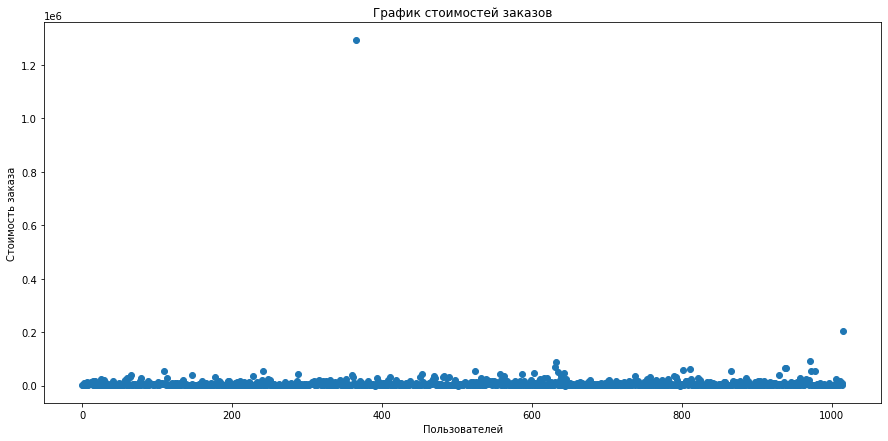

In [26]:
# строим точечный график стоимостей заказов

x_value = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15,7))
plt.title(f'График стоимостей заказов')
plt.xlabel('Пользователей')
plt.ylabel(f'Стоимость заказа')
plt.scatter(x_value,orders['revenue'])
plt.show()

<span style="color:#37474f;">Точки стоимости на графике показывают выбросы. И это практически без сомнений. Расмотрим перцентили</span>

<h3><span style="color:#37474f;">95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.</span></h3>

In [27]:
perc=[95,99] # задаем целевые перцентили
abnormal_revenue = np.percentile(orders['revenue'],perc)

for i in range(0,len(perc)):
    print(f'Не более {100-perc[i]}% заказов дороже {int(abnormal_revenue[i])}')
print(np.percentile(orders['revenue'],[95,99]))

Не более 5% заказов дороже 26785
Не более 1% заказов дороже 53904
[26785. 53904.]


<span style="color:#37474f;">95% заказов - до 26785 у.е., 5% - дороже этой суммы, но всего 1% дороже 53904</span>

In [28]:
# возьмем за аномальные значения 99 перцентиль, т.е. заказ стоимостью более 53904
abnormal_revenue = abnormal_revenue[1]

<span style="color:#37474f;">Как и в случае с количеством заказов, аномальными значениями принимаем сумму, больше 99 перцентиля, т.е. больше 53904 у.е.</span>

<h3><span style="color:#37474f;">Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы</span></h3>

In [29]:
# функция формирования выборки для группы A 
# аргументы: включить аномальных пользователей в расчет и список аномальных пользователей, если 
# их включать не надо
def sampleA(use_abnornmal_data=True,abnormal_visitors=''):
    
    tempA = (
        orders.query('group=="A"')
              .groupby(['visitorId'],as_index=False)
              .agg({'transactionId':'nunique'})
              .rename(columns={'transactionId':'orders'})
    )
    
    if use_abnornmal_data == False:
        tempA=tempA.query('~visitorId.isin(@abnormal_visitors)')
        
    sampleA = pd.concat([tempA['orders'],
                         pd.Series(0, index=np.arange(visitors.query('group=="A"')['visitors'].sum() - len(tempA['orders'])),
                                   name='orders')],
                        axis=0)
    return sampleA

In [30]:
# функция формирования выборки для группы B 
# аргументы: включить аномальных пользователей в расчет и список аномальных пользователей, если 
# их включать не надо
def sampleB(use_abnornmal_data=True,abnormal_visitors=''):
    
    tempB = (
        orders.query('group=="B"')
              .groupby(['visitorId'],as_index=False)
              .agg({'transactionId':'nunique'})
              .rename(columns={'transactionId':'orders'})
    )
    
    if use_abnornmal_data == False:
        tempB=tempB.query('~visitorId.isin(@abnormal_visitors)')

    sampleB = pd.concat([tempB['orders'],
                         pd.Series(0, index=np.arange(visitors.query('group=="B"')['visitors'].sum() - len(tempB['orders'])),
                                   name='orders')],
                        axis=0) 
    return sampleB

<p><span style="color:#37474f;">Гипотезы:</span></p>
<p><span style="color:#37474f;">H<sub>0</sub>: Статистически значимых различий в среднем количестве заказов между группами по "сырым" данным нет</span></p>
<p><span style="color:#37474f;">H<sub>1</sub>: Статистически значимые различия в среднем количестве заказов между группами по "сырым" данным есть</span></p>
<hr>
<p><span style="color:#37474f;">Здесь и далее для тестирования был использован тест Манна-Уитни, т.к. при анализе данных были выявлены выбросы, от которых нельзя избавится без потери корректности теста.</span></p>
<p><span style="color:#37474f;">Статистический уровень значимости принимаем стандартный в 0,05</span></p>

In [31]:
groupA = sampleA(use_abnornmal_data=True)
groupB = sampleB(use_abnornmal_data=True)

print('P-Value: '"{0:.3f}".format(stats.mannwhitneyu(groupA,groupB)[1]))

print(f'Относительное различие: {round(groupB.mean()/groupA.mean()-1,2)}')

del groupA,groupB

P-Value: 0.011
Относительное различие: 0.16


<p><span style="color:#37474f;">P-value после проведения теста меньше, чем заданный уровень статистической значимости (0,011&lt;0,05). Значит, H<sub>0</sub> отвергается. Разница в данных есть.<br><br>Среднее количество заказов по "сырым" данным в группе B больше на 16%, чем в группе A </span></p>

<h3><span style="color:#37474f;">Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы</span></h3>

<p><span style="color:#37474f;">Гипотезы:</span></p>
<p><span style="color:#37474f;">H<sub>0</sub>: Статистически значимых различий в среднем чеке заказа между группами по "сырым" данным нет</span></p>
<p><span style="color:#37474f;">H<sub>1</sub>: Статистически значимые различия в среднем чеке заказа между группами по "сырым" данным есть</span></p>
<hr>
<p><span style="color:#37474f;">Статистический уровень значимости принимаем стандартный в 0,05</span></p>

In [32]:
groupA = orders.query('group=="A"')['revenue']
groupB = orders.query('group=="B"')['revenue']

print('P-Value: '"{0:.3f}".format(stats.mannwhitneyu(groupA,groupB)[1]))

print(f'Относительное различие: {round(groupB.mean()/groupA.mean()-1,2)}')

del groupA,groupB

P-Value: 0.829
Относительное различие: 0.29


<p><span style="color:#37474f;">P-value после проведения теста ощутимо больше, чем заданный уровень статистической значимости (0,829&gt;0,05). Значит, H<sub>1</sub> отвергать нет оснований.<br><br>Средний чек заказа в группе B по "сырым" данным на 29% больше, чем в группе A</span></p>

<h3><span style="color:#37474f;">Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы</span></h3>

<p><span style="color:#37474f;">Гипотезы:</span></p>
<p><span style="color:#37474f;">H<sub>0</sub>: Статистически значимых различий в среднем количестве заказов между группами по "очищенным" данным нет</span></p>
<p><span style="color:#37474f;">H<sub>1</sub>: Статистически значимые различия в среднем количестве заказов между группами по "очищенным" данным есть</span></p>
<hr>
<p><span style="color:#37474f;">Статистический уровень значимости принимаем стандартный в 0,05</span></p>

In [33]:
# выделяем посетителей с аномальным количеством заказов 
# или суммой заказа, превышающей заданный уровень
abnormal_visitors =(orders
 .groupby('visitorId',as_index=False)
 .agg({'transactionId':'nunique','revenue':'max'})
 .query('transactionId>=@abnormal_order or revenue>@abnormal_revenue')
 .drop_duplicates()
)['visitorId']

print(f'Количество аномальных посетителей: {len(abnormal_visitors)}\
({round(100*len(abnormal_visitors)/orders["visitorId"].nunique(),2)}% от общего количества)')

Количество аномальных посетителей: 45(4.62% от общего количества)


In [34]:
groupA = sampleA(use_abnornmal_data=False,abnormal_visitors=abnormal_visitors)
groupB = sampleB(use_abnornmal_data=False,abnormal_visitors=abnormal_visitors)

print('P-Value: '"{0:.3f}".format(stats.mannwhitneyu(groupA,groupB)[1]))

print(f'Относительное различие: {round(groupB.mean()/groupA.mean()-1,2)}')

del groupA,groupB

P-Value: 0.008
Относительное различие: 0.19


<p><span style="color:#37474f;">P-value после проведения теста меньше, чем заданный уровень статистической значимости, но практически не изменился по сравнению с "сырыми" данными (0,008&lt;0,05). Значит, H<sub>0</sub> &nbsp;так же отвергается. Разница в данных продолжает оставаться и после удаления аномальных посетителей.<br><br>Среднее количество заказов по "очищенным" данным в группе B больше на 19%, чем в группе A, т.е. несколько больше, чем по "сырым"</span></p>

<h3><span style="color:#37474f;">Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы</span></h3>

<p><span style="color:#37474f;">Гипотезы:</span></p>
<p><span style="color:#37474f;">H<sub>0</sub>: Статистически значимых различий в среднем чеке заказа между группами по "очищенным" данным нет</span></p>
<p><span style="color:#37474f;">H<sub>1</sub>: Статистически значимые различия в среднем чеке заказа между группами по "очищенным" данным есть</span></p>
<hr>
<p><span style="color:#37474f;">Статистический уровень значимости принимаем стандартный в 0,05</span></p>

In [35]:
groupA = orders.query('group=="A" and ~visitorId.isin(@abnormal_visitors)')['revenue']
groupB = orders.query('group=="B" and ~visitorId.isin(@abnormal_visitors)')['revenue']

print('P-Value: '"{0:.3f}".format(stats.mannwhitneyu(groupA,groupB)[1]))

print(f'Относительное различие: {round(groupB.mean()/groupA.mean()-1,2)}')

del groupA,groupB

P-Value: 0.969
Относительное различие: 0.0


<p><span style="color:#37474f;">P-value после удаления аномальных пользователей стал еще больше, чем заданный уровень статистической значимости (0,969&gt;0,05). Значит, H<sub>1</sub> не отвергается и в этом случае.<br><br>Средний чек заказа в группе B по "очищенным" данным не отличается от группы A</span></p>

<h2><span style="color:#37474f;">Решение по результатам теста</span></h2>

<p><span style="color:#37474f;">
    <p>В ходе проведенного исследования были построены, рассмотрены и проанализированы графики сравнения и изменения кумулятивных средних чеков и выручек между группами тестирования A и B.<br><br>Были найдены аномальные значения количества заказов и их сумм.<br>
Были проверены гипотезы значимости различий.<br><br>В качестве общего вывода, объединив выводы по кумулятивным данным и статистическим различиям, можно сказать, что группа B имеет более высокое количество заказов - это наглядно видно на графиках, но сумма среднего чека, особенно после очистки данных от аномальных зачений, не отличается - статистические выводы получаются именно такие.<br>Вкупе, этот факт приведет к росту выручки, но задачу по возможности увеличения среднего чека было бы не плохо принять в работу. В этом случае, при успехе её выполнения, рост выручки может произойти кратно исходному.<br><br>
    На текущем же этапе, тест можно признать успешным и закончить его</p></span></p>